In [37]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
iris=datasets.load_iris()
iris.keys()
print(iris.DESCR)
print(iris.feature_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [42]:
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['target']=iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


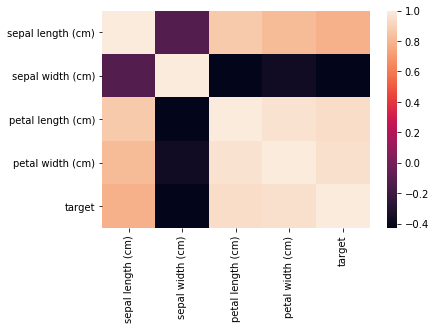

In [43]:
sns.heatmap(iris_df.corr())

In [39]:
# We train our datset to tell if it is Iris Virginica
x=iris['data'][:, 3:]
y=(iris['target']==2).astype(np.int64)

In [40]:
# Train a logistic regression Classifier
clf=LogisticRegression()
clf.fit(x,y)

LogisticRegression()

In [48]:
# Predict if a flower with petal width 2.6 be a iris virginica
ex=clf.predict([[2.6]])
print(ex)

[1]


[[9.99250016e-01 7.49984089e-04]
 [9.99240201e-01 7.59799387e-04]
 [9.99230257e-01 7.69743043e-04]
 ...
 [3.08374822e-03 9.96916252e-01]
 [3.04400296e-03 9.96955997e-01]
 [3.00476842e-03 9.96995232e-01]]


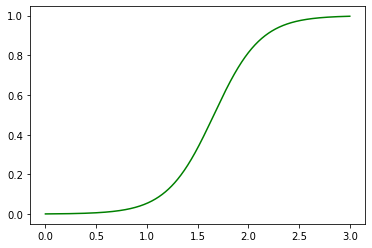

In [64]:
# use matplotliv to plot the visualisation
X_new=np.linspace(0,3,1000).reshape(-1,1)
X_prob=clf.predict_proba(X_new)
print(X_prob)
# Since clf.predict gives probabilities for all classes
# we Require the probability of a flower being a
# Iris Virginica
plt.plot(X_new,X_prob[:,1],'g-',
        label="Virginica")
plt.show()